# Map and Trend Sandbox

This is the jupyter file for messing with map files and data trending.

In [27]:
import pandas as pd
from pathlib import Path
import seaborn as sns

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with artical at:

https://www.nytimes.com/article/coronavirus-county-data-us.html



In [28]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

path_covid_data_us_counties_1 = datapath / 'covid-19-data-20200706' / 'us-counties.csv'
path_covid_data_us_counties_2 = datapath / 'covid-19-data-20200720' / 'us-counties.csv'
path_covid_data_us_counties_3 = datapath / 'covid-19-data-20200813' / 'us-counties.csv'
path_covid_data_us_counties_4 = datapath / 'covid-19-data-20200820' / 'us-counties.csv'


In [4]:
print(path_covid_data_us_counties_1)

..\data\covid-19-data-20200706\us-counties.csv


In [29]:
# read covid data

df_covid_data_us_counties_1 = pd.read_csv(path_covid_data_us_counties_1)
df_covid_data_us_counties_2 = pd.read_csv(path_covid_data_us_counties_2)
df_covid_data_us_counties_3 = pd.read_csv(path_covid_data_us_counties_3)
df_covid_data_us_counties_4 = pd.read_csv(path_covid_data_us_counties_4)



In [17]:
#df_covid_data_us_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Virginia Counties:

Culpeper county, va (51047)
Fauquier county, va (51061) 
Spotsylvania county, va(51177) 
Stafford county, va (51179)
Prince William county, va (51153) 
Fairfax county, va (51059)
Loudoun county, va (51107)
Arlington county, va (51013) 

### Independent Virginia Cities:

City of Fredericksburg, VA (51630) 
City of Manassas, VA (51683) 
City of Fairfax, VA (51600)
City of Falls Church, VA (51610)
City of Alexandria, VA (51510)

### Federal District:

District of Columbia, DC (11000, 11001, 11000)

### Maryland Counties:

Charles county, md (24017)
Prince Georges county, md (24033)
Montgomery county, md (24031)
Howard county, md (24027)
Anne Arundel county, md (fips 24003)
Frederick county, md (24021)

In [30]:
# make a list of all the counties i'm interested in

list_fips_va_counties = [51047, 51061, 51177, 51179, 51153, 51059, 51107,51013]
list_fips_va_cities = [51630, 51683, 51600, 51610, 51510]
list_fips_dc = [11000, 11001]
list_fips_md = [24017, 24033, 24031, 24027, 24003, 24021]

list_fips_va = list_fips_va_counties + list_fips_va_cities

list_fips_metrodc = list_fips_va + list_fips_dc + list_fips_md 

In [31]:
df_covid_data_metrodc_1 = df_covid_data_us_counties_1[df_covid_data_us_counties_1.fips.isin(list_fips_metrodc)]
df_covid_data_metrodc_2 = df_covid_data_us_counties_2[df_covid_data_us_counties_2.fips.isin(list_fips_metrodc)]
df_covid_data_metrodc_3 = df_covid_data_us_counties_3[df_covid_data_us_counties_3.fips.isin(list_fips_metrodc)]
df_covid_data_metrodc_4 = df_covid_data_us_counties_4[df_covid_data_us_counties_4.fips.isin(list_fips_metrodc)]

In [33]:
#df_covid_data_metrodc.head()

,date,county,state,fips,cases,deaths
555,2020-03-05,Montgomery,Maryland,24031.0,3,0
615,2020-03-06,Montgomery,Maryland,24031.0,3,0
682,2020-03-07,District of Columbia,District of Columbia,11001.0,1,0
700,2020-03-07,Montgomery,Maryland,24031.0,3,0
739,2020-03-07,Fairfax,Virginia,51059.0,1,0


In [32]:
# df.groupby(['Name', 'Fruit'])[['Number']].agg('sum').reset_index()

df_covid_data_metrodc_bydate_1 = df_covid_data_metrodc_1.groupby(['date'])['cases', 'deaths'].agg('sum').reset_index()
df_covid_data_metrodc_bydate_2 = df_covid_data_metrodc_2.groupby(['date'])['cases', 'deaths'].agg('sum').reset_index()
df_covid_data_metrodc_bydate_3 = df_covid_data_metrodc_3.groupby(['date'])['cases', 'deaths'].agg('sum').reset_index()
df_covid_data_metrodc_bydate_4 = df_covid_data_metrodc_4.groupby(['date'])['cases', 'deaths'].agg('sum').reset_index()

C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [39]:
#df_covid_data_metrodc_bydate.head()

,date,cases,deaths
0,2020-03-05,3,0
1,2020-03-06,3,0
2,2020-03-07,5,0
3,2020-03-08,7,0
4,2020-03-09,13,0


In [41]:
# seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)¶

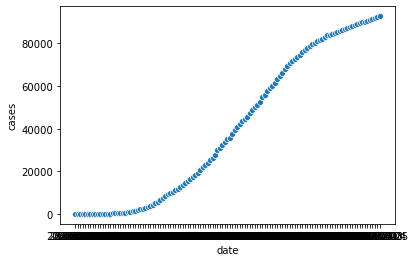

In [63]:
sns.scatterplot(df_covid_data_metrodc_bydate_1.date, df_covid_data_metrodc_bydate_1.cases)

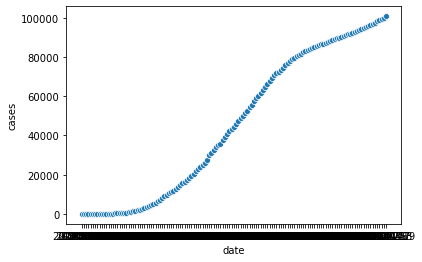

In [64]:
sns.scatterplot(df_covid_data_metrodc_bydate_2.date, df_covid_data_metrodc_bydate_2.cases)

now, how to get the new daily cases. diff by day, right? lag 1?


In [33]:
df_covid_data_metrodc_bydate_diff_1 = df_covid_data_metrodc_1.groupby(['date'])['cases', 'deaths'].agg('sum').diff().reset_index()
df_covid_data_metrodc_bydate_diff_2 = df_covid_data_metrodc_2.groupby(['date'])['cases', 'deaths'].agg('sum').diff().reset_index()
df_covid_data_metrodc_bydate_diff_3 = df_covid_data_metrodc_3.groupby(['date'])['cases', 'deaths'].agg('sum').diff().reset_index()
df_covid_data_metrodc_bydate_diff_4 = df_covid_data_metrodc_4.groupby(['date'])['cases', 'deaths'].agg('sum').diff().reset_index()

C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


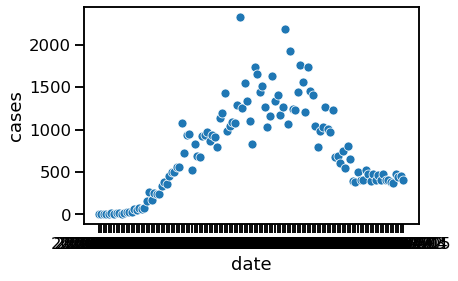

In [13]:
sns.scatterplot(df_covid_data_metrodc_bydate_diff_1.date, df_covid_data_metrodc_bydate_diff_1.cases)

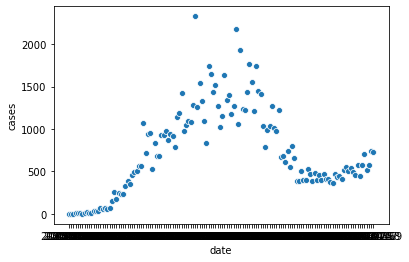

In [67]:
sns.scatterplot(df_covid_data_metrodc_bydate_diff_2.date, df_covid_data_metrodc_bydate_diff_2.cases)

In [14]:
df_covid_data_metrodc_bydate_diff_2.tail()

,date,cases,deaths
132,2020-07-15,704.0,15.0
133,2020-07-16,518.0,11.0
134,2020-07-17,572.0,9.0
135,2020-07-18,744.0,11.0
136,2020-07-19,730.0,1.0


In [15]:
df_covid_data_metrodc_bydate_diff_1.tail()

,date,cases,deaths
118,2020-07-01,365.0,19.0
119,2020-07-02,476.0,12.0
120,2020-07-03,440.0,16.0
121,2020-07-04,452.0,7.0
122,2020-07-05,408.0,4.0


https://wtop.com/coronavirus/2020/05/coronavirus-timeline-key-dates-as-the-virus-spread-in-dc-maryland-and-virginia/

- 11 March - beginning of initial lockdown
- 7 May - some restrictions lift


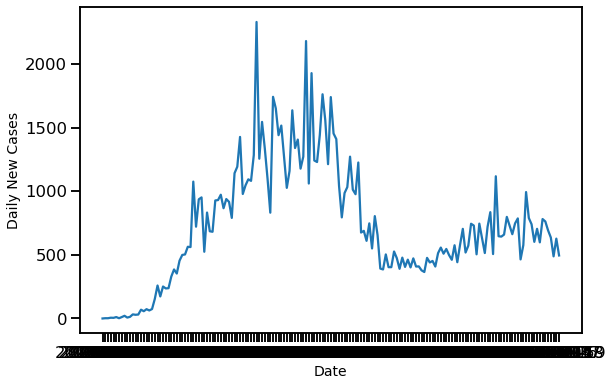

In [34]:
import matplotlib.pyplot as plt

# bigger plot elements suitable for giving talks
sns.set_context("talk")
# set figure size
plt.figure(figsize=(9,6))
# Time series plot with Seaborn lineplot()
sns.lineplot(x="date", y="cases", 
            data=df_covid_data_metrodc_bydate_diff_4, ci=None)
# axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)
# save image as PNG file
plt.savefig("Time_Series_Plot_with_Seaborn.png",
                    format='png',
                    dpi=150)

In [35]:
df_covid_data_metrodc_bydate_diff_4['cases_7day_ave'] = df_covid_data_metrodc_bydate_diff_4.cases.rolling(7).mean().shift(-3)

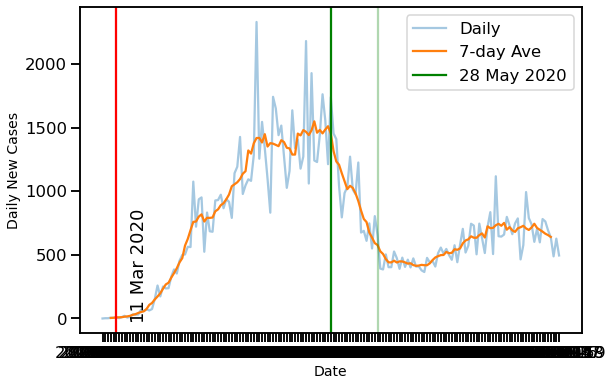

In [36]:
# bigger plot elements suitable for giving talks
sns.set_context("talk")
# set figure size
plt.figure(figsize=(9,6))
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="cases",
             label="Daily", data=df_covid_data_metrodc_bydate_diff_4,
             ci=None, alpha=.4)
# 7-day rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="cases_7day_ave",
             label="7-day Ave",
             data=df_covid_data_metrodc_bydate_diff_4,
             ci=None)

plt.axvline('2020-03-11', color='r')
plt.text(10.1,0,'11 Mar 2020',rotation=90)
#plt.axvline('2020-05-07', 0,1)
plt.axvline('2020-05-28', color='green', label="28 May 2020")
plt.axvline('2020-06-14', color='green', alpha=.31)
#plt.axvline('2020-07-18', 0,1)
plt.legend()
# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)
# save image as PNG file
plt.savefig("Time_Series_Plot_with_7day_average_Seaborn.png",
                    format='png',
                    dpi=150)